# PokerRL Metrics Visualization

This notebook visualizes training metrics for PPO agents from the metrics folder.

In [26]:
import os
import pickle
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set Seaborn style for better visualizations
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'figure.figsize': (12, 8)})

In [27]:
# Path to metrics directory
metrics_dir = 'poker/policy_training/metrics/'

# Get list of all metrics files
metric_files = glob.glob(os.path.join(metrics_dir, '*_metrics.pkl'))
print(f"Found {len(metric_files)} metric files")
for file in metric_files:
    print(f" - {os.path.basename(file)}")

Found 9 metric files
 - PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_1000_metrics.pkl
 - PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_5_metrics.pkl
 - PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_2000_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_REPLAY_10_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_REPLAY_5_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_20_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_REPLAY_1000_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_5_metrics.pkl
 - PPO_2_HEUR_2_RAND_0_REPLAY_2000_metrics.pkl


In [28]:
# Function to load and parse metric files
def load_metrics(file_path):
    with open(file_path, 'rb') as f:
        metrics = pickle.load(f)
    
    # Extract experiment details from filename
    basename = os.path.basename(file_path)
    experiment_name = basename.split('_metrics.pkl')[0]
    
    # Add experiment name to metrics
    metrics['experiment'] = experiment_name
    
    return metrics

# Load all metrics files
all_metrics = [load_metrics(file) for file in metric_files]

# Filter to only include files with enough data points (more than 5)
filtered_metrics = [m for m in all_metrics if len(m['game_numbers']) > 5]

print(f"Loaded {len(filtered_metrics)} metric files with sufficient data points")

Loaded 4 metric files with sufficient data points


## Win Rate Plots

Let's visualize the win rates during training and evaluation.

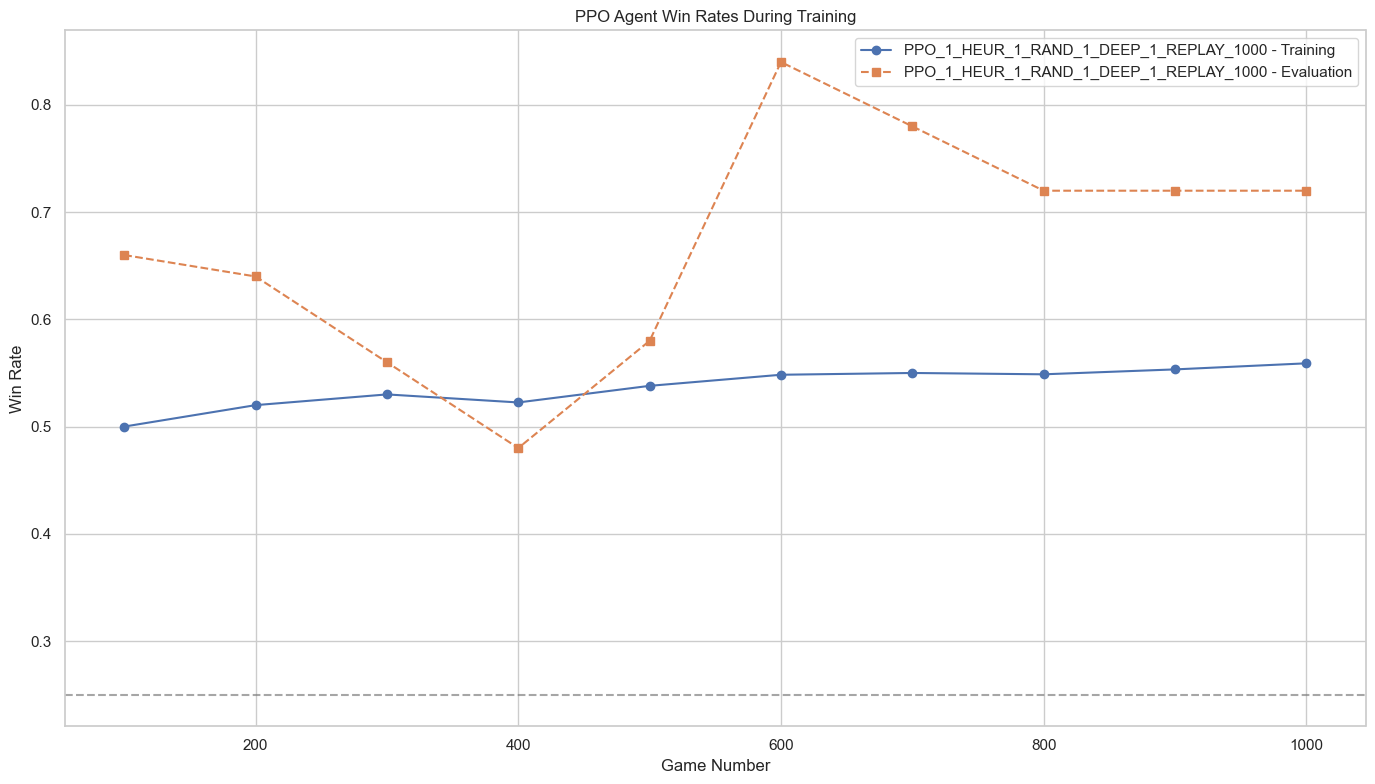

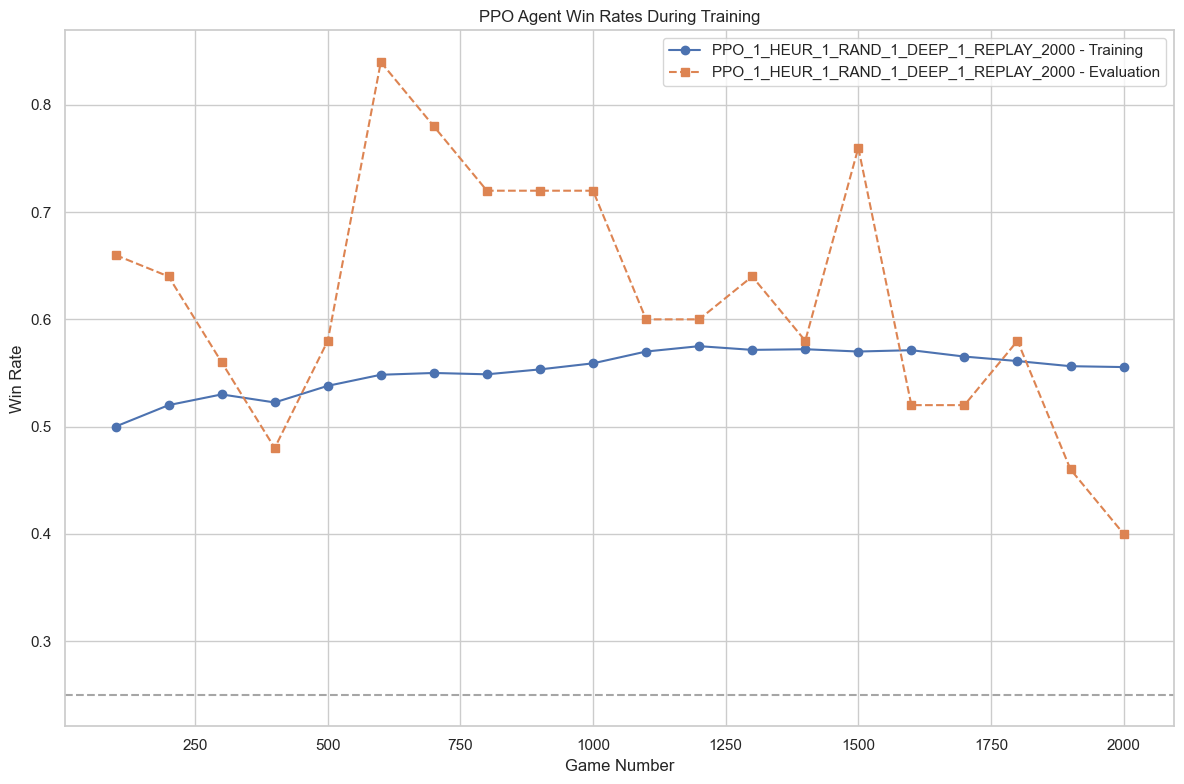

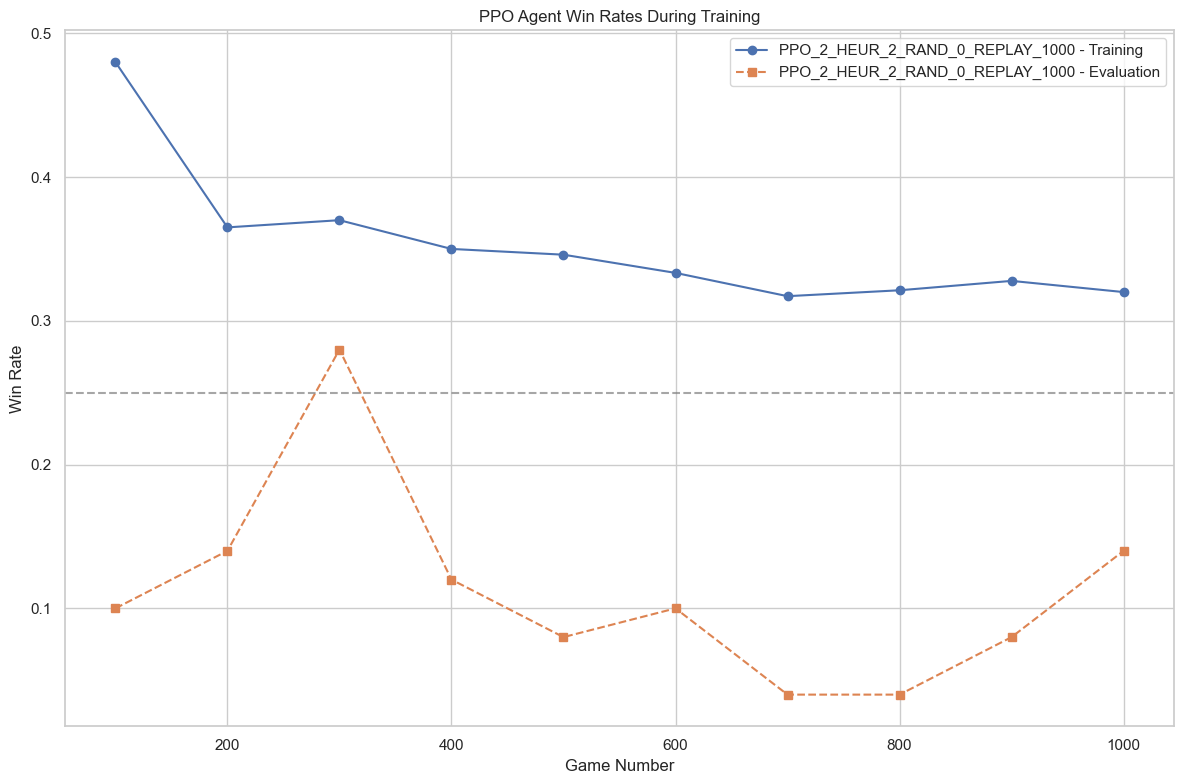

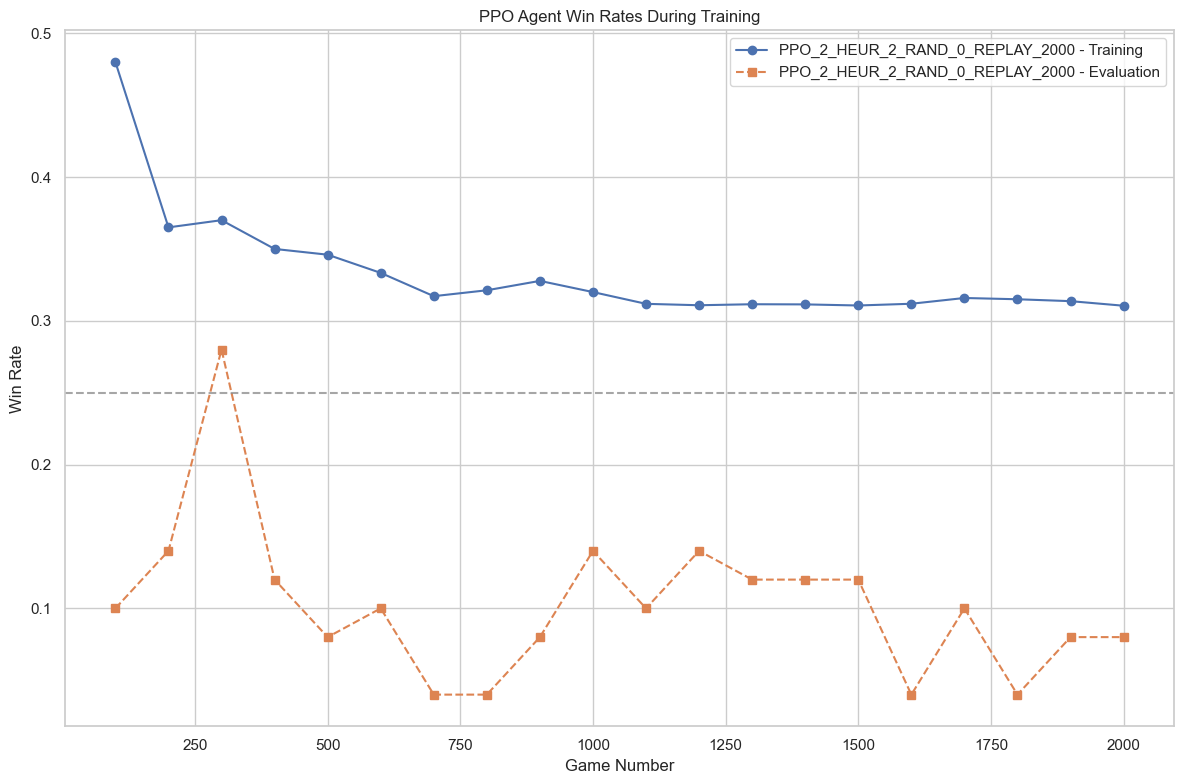

In [29]:
def plot_win_rates(metrics_list):
    plt.figure(figsize=(14, 8))
    
    for metrics in metrics_list:
        experiment = metrics['experiment']
        game_numbers = metrics['game_numbers']
        win_rates = metrics['win_rates']
        eval_win_rates = metrics['eval_win_rates']
        
        # Plot training win rate
        plt.plot(game_numbers, win_rates, 'o-', label=f"{experiment} - Training")
        
        # Plot evaluation win rate
        plt.plot(game_numbers, eval_win_rates, 's--', label=f"{experiment} - Evaluation")
    
        plt.xlabel('Game Number')
        plt.ylabel('Win Rate')
        plt.title('PPO Agent Win Rates During Training')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        
        # Add horizontal line at 0.25 (random chance for 4 players)
        plt.axhline(0.25, color='gray', linestyle='--', alpha=0.7, label='Random Chance (4 players)')
        
        plt.show()

plot_win_rates(filtered_metrics)

## Stack Change Plots

Let's examine how the stack changes over time, which shows how much the agent is winning or losing.

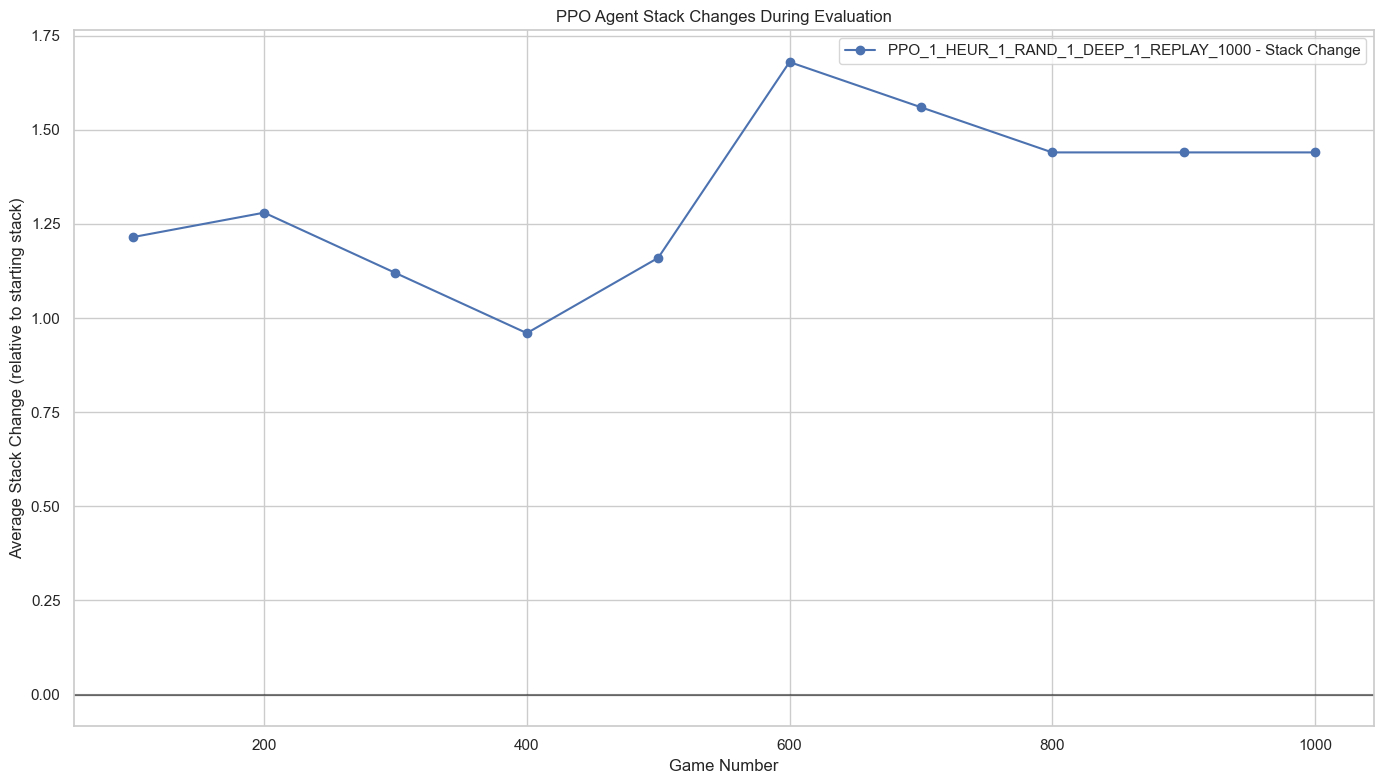

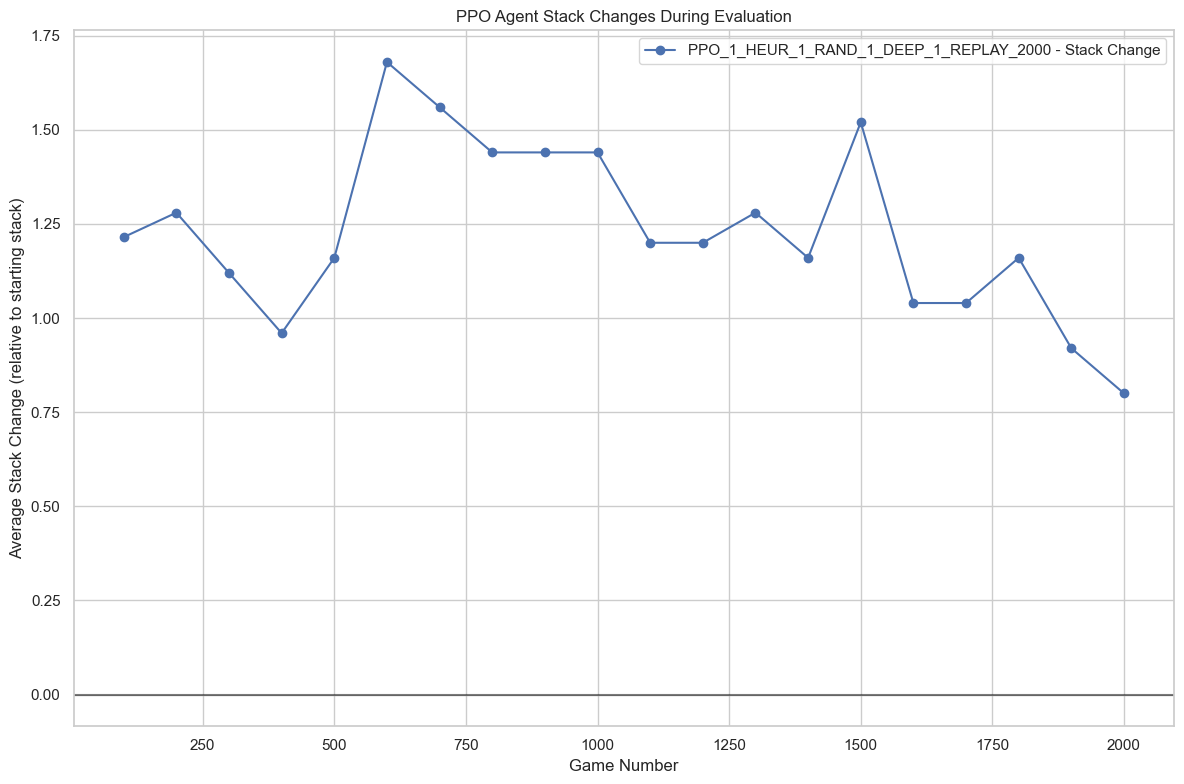

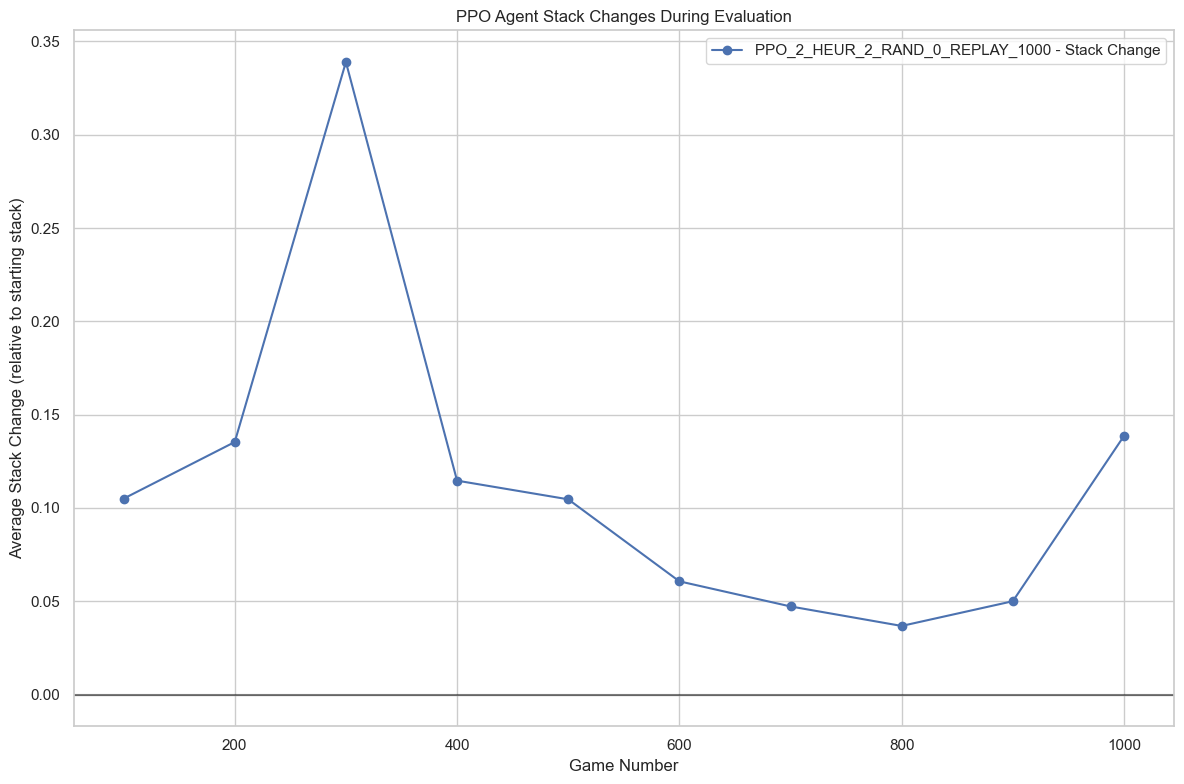

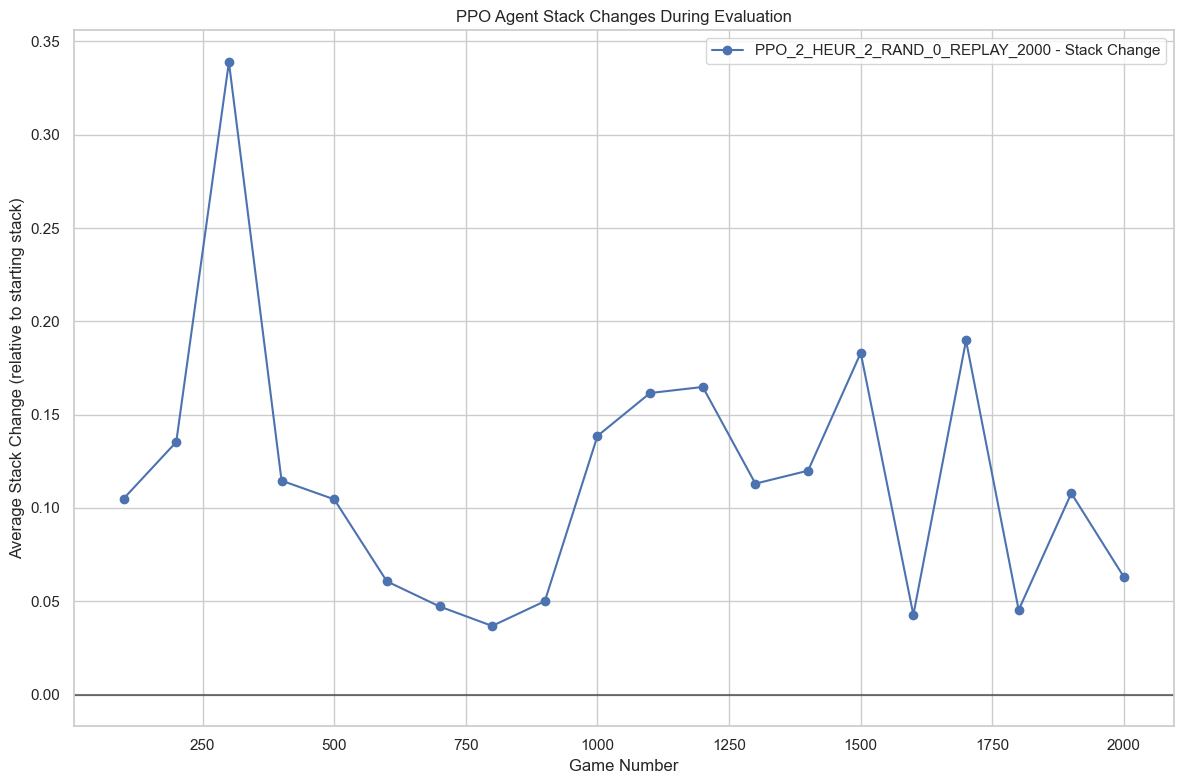

In [30]:
def plot_stack_changes(metrics_list):
    plt.figure(figsize=(14, 8))
    
    for metrics in metrics_list:
        experiment = metrics['experiment']
        game_numbers = metrics['game_numbers']
        eval_stack_changes = metrics['eval_stack_changes']
        
        # Plot evaluation stack changes
        plt.plot(game_numbers, eval_stack_changes, 'o-', label=f"{experiment} - Stack Change")
    
        plt.xlabel('Game Number')
        plt.ylabel('Average Stack Change (relative to starting stack)')
        plt.title('PPO Agent Stack Changes During Evaluation')
        plt.legend()
        plt.grid(True)
        
        # Add horizontal line at 0 (break-even)
        plt.axhline(0, color='black', linestyle='-', alpha=0.5, label='Break Even')
        
        plt.tight_layout()
        plt.show()

plot_stack_changes(filtered_metrics)

## Loss Plots

Let's visualize how the PPO loss changes during training.

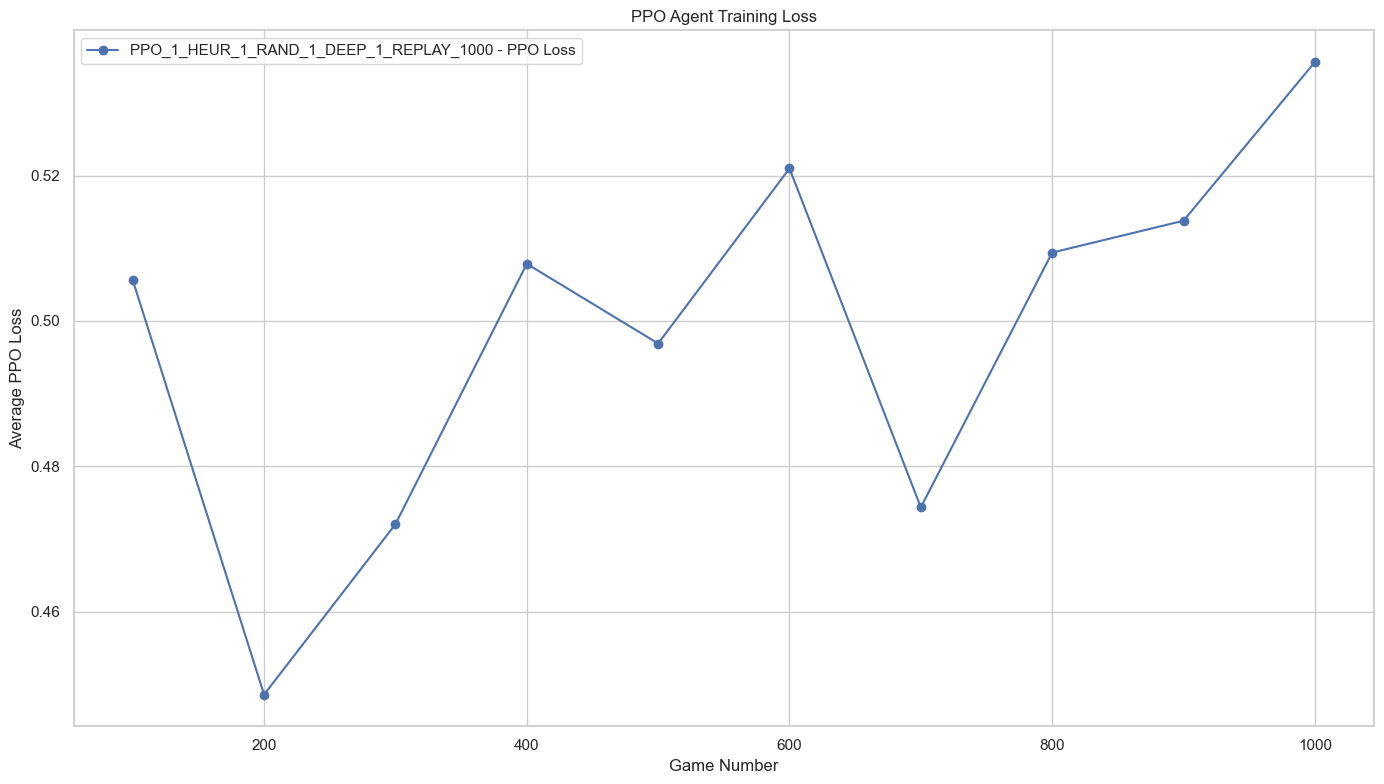

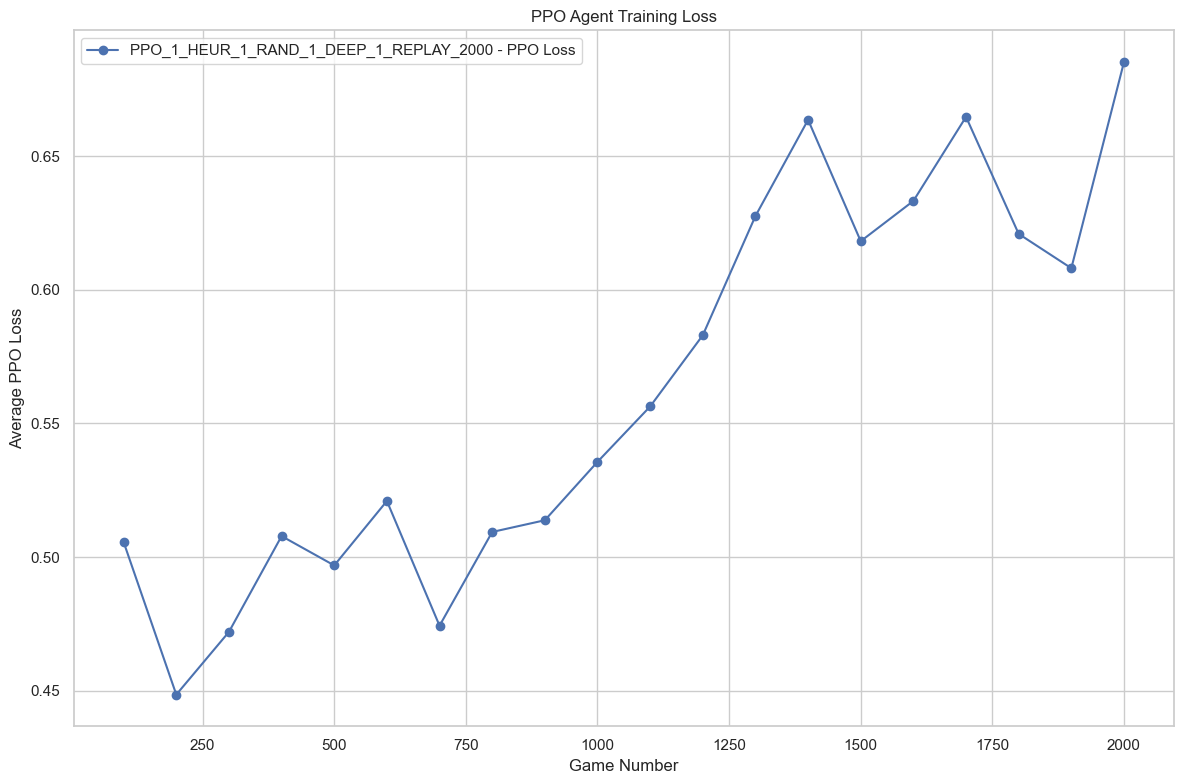

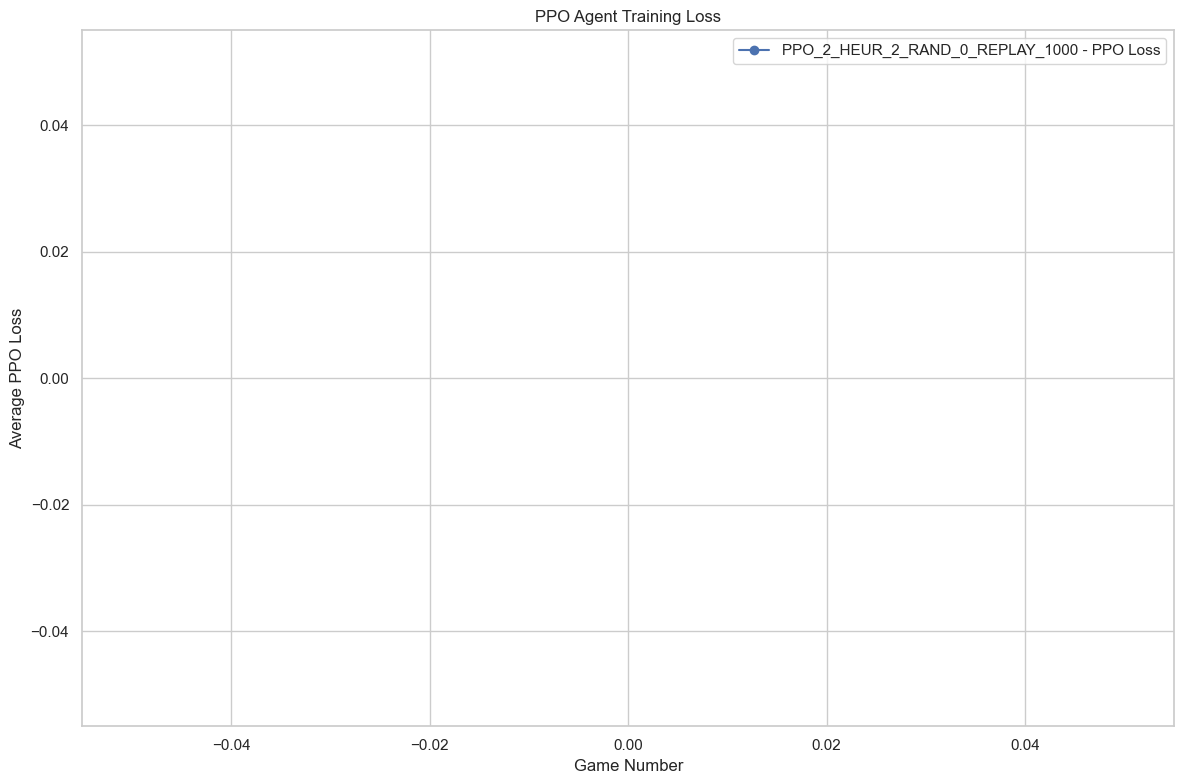

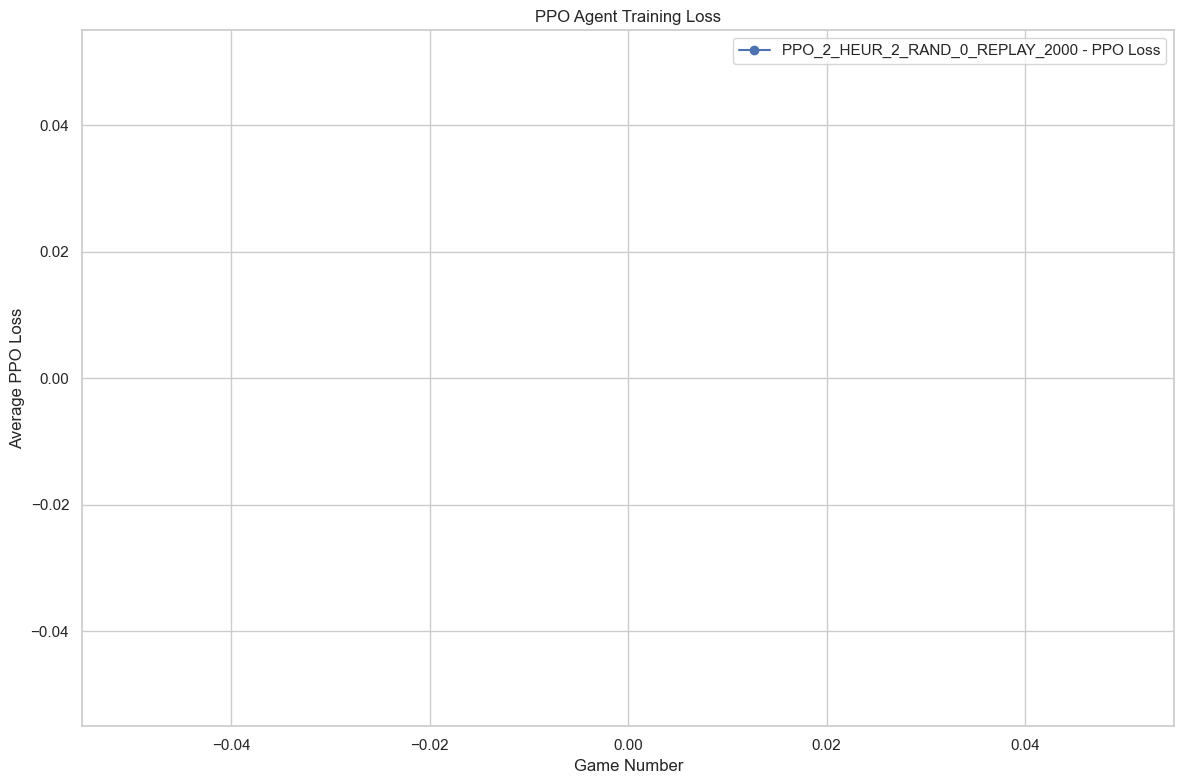

In [31]:
def plot_ppo_losses(metrics_list):
    plt.figure(figsize=(14, 8))
    
    for metrics in metrics_list:
        experiment = metrics['experiment']
        game_numbers = metrics['game_numbers']
        ppo_losses = metrics['ppo_losses']
        
        # Plot ppo losses
        plt.plot(game_numbers, ppo_losses, 'o-', label=f"{experiment} - PPO Loss")
    
        plt.xlabel('Game Number')
        plt.ylabel('Average PPO Loss')
        plt.title('PPO Agent Training Loss')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_ppo_losses(filtered_metrics)

In [32]:
for metrics in filtered_metrics:
    experiment = metrics['experiment']
    print(f"\nCorrelation analysis for {experiment}:")
    
    # Create a DataFrame with all metrics
    data = {
        'game_number': metrics['game_numbers'],
        'win_rate': metrics['win_rates'],
        'eval_win_rate': metrics['eval_win_rates'],
        'stack_change': metrics['eval_stack_changes'],
        'ppo_loss': metrics['ppo_losses']
    }
    df = pd.DataFrame(data)
    break


Correlation analysis for PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_1000:


In [25]:
df

,game_number,win_rate,eval_win_rate,stack_change,ppo_loss
0,100,0.160000,0.30,0.15195,NaN
1,200,0.170000,0.26,0.09895,NaN
2,300,0.180000,0.28,0.17255,NaN
3,400,0.177500,0.22,0.18030,NaN
4,500,0.180000,0.22,0.14365,NaN
5,600,0.176667,0.30,0.19590,NaN
6,700,0.164286,0.20,0.06545,NaN
7,800,0.157500,0.26,0.13395,NaN
8,900,0.155556,0.22,0.14665,NaN
9,1000,0.155000,0.26,0.10275,NaN


## Correlation Analysis

Let's analyze the correlation between different metrics.

In [ ]:
    # Add these plots if the metrics include these keys
    if 'mean_episode_rewards' in metrics and len(metrics['mean_episode_rewards']) > 0:
        plt.figure(figsize=(12, 6))
        x = metrics['game_numbers'][:len(metrics['mean_episode_rewards'])]
        plt.plot(x, metrics['mean_episode_rewards'], label='Mean Episode Reward', marker='o', linestyle='-')
        plt.title(f'{experiment_label}: Mean Episode Rewards')
        plt.xlabel('Game Number')
        plt.ylabel('Mean Reward')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f'{experiment_label}_mean_episode_rewards.png'))
        plt.close()

    # Plot cumulative reward history if available
    if 'cumulative_reward_history' in metrics and len(metrics['cumulative_reward_history']) > 0:
        plt.figure(figsize=(12, 6))
        x = range(1, len(metrics['cumulative_reward_history']) + 1)  # Game numbers
        plt.plot(x, metrics['cumulative_reward_history'], label='Cumulative Reward', linestyle='-')
        plt.title(f'{experiment_label}: Cumulative Reward Over Training')
        plt.xlabel('Game Number')
        plt.ylabel('Cumulative Reward')
        plt.legend()
        plt.grid(True)
        plt.savefig(os.path.join(output_dir, f'{experiment_label}_cumulative_reward_history.png'))
        plt.close()

## Training Progress Summary

Let's summarize the training progress across different experiments.

In [34]:
def summarize_training(metrics_list):
    summary_data = []
    
    for metrics in metrics_list:
        experiment = metrics['experiment']
        
        # Get first and last values for each metric
        initial_win_rate = metrics['win_rates'][0] if metrics['win_rates'] else None
        final_win_rate = metrics['win_rates'][-1] if metrics['win_rates'] else None
        win_rate_change = final_win_rate - initial_win_rate if initial_win_rate is not None and final_win_rate is not None else None
        
        initial_eval_win_rate = metrics['eval_win_rates'][0] if metrics['eval_win_rates'] else None
        final_eval_win_rate = metrics['eval_win_rates'][-1] if metrics['eval_win_rates'] else None
        eval_win_rate_change = final_eval_win_rate - initial_eval_win_rate if initial_eval_win_rate is not None and final_eval_win_rate is not None else None
        
        initial_stack_change = metrics['eval_stack_changes'][0] if metrics['eval_stack_changes'] else None
        final_stack_change = metrics['eval_stack_changes'][-1] if metrics['eval_stack_changes'] else None
        stack_change_improvement = final_stack_change - initial_stack_change if initial_stack_change is not None and final_stack_change is not None else None
        
        # Add to summary data
        summary_data.append({
            'Experiment': experiment,
            'Training Points': len(metrics['game_numbers']),
            'Initial Win Rate': initial_win_rate,
            'Final Win Rate': final_win_rate,
            'Win Rate Change': win_rate_change,
            'Initial Eval Win Rate': initial_eval_win_rate,
            'Final Eval Win Rate': final_eval_win_rate,
            'Eval Win Rate Change': eval_win_rate_change,
            'Initial Stack Change': initial_stack_change,
            'Final Stack Change': final_stack_change,
            'Stack Change Improvement': stack_change_improvement
        })
    
    # Create DataFrame and display
    summary_df = pd.DataFrame(summary_data)
    
    # Format for display
    formatted_df = summary_df.copy()
    for col in formatted_df.columns:
        if col != 'Experiment' and col != 'Training Points':
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.4f}" if x is not None else "N/A")
    
    return formatted_df

summary_table = summarize_training(filtered_metrics)
summary_table

,Experiment,Training Points,Initial Win Rate,Final Win Rate,Win Rate Change,Initial Eval Win Rate,Final Eval Win Rate,Eval Win Rate Change,Initial Stack Change,Final Stack Change,Stack Change Improvement
0,PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_1000,10,0.5000,0.5590,0.0590,0.6600,0.7200,0.0600,1.2150,1.4400,0.2250
1,PPO_1_HEUR_1_RAND_1_DEEP_1_REPLAY_2000,20,0.5000,0.5555,0.0555,0.6600,0.4000,-0.2600,1.2150,0.8000,-0.4150
2,PPO_2_HEUR_2_RAND_0_REPLAY_1000,10,0.4800,0.3200,-0.1600,0.1000,0.1400,0.0400,0.1050,0.1386,0.0336
3,PPO_2_HEUR_2_RAND_0_REPLAY_2000,20,0.4800,0.3105,-0.1695,0.1000,0.0800,-0.0200,0.1050,0.0630,-0.0420


## Final Comparison

Let's create a bar chart comparing the final performance metrics across experiments.

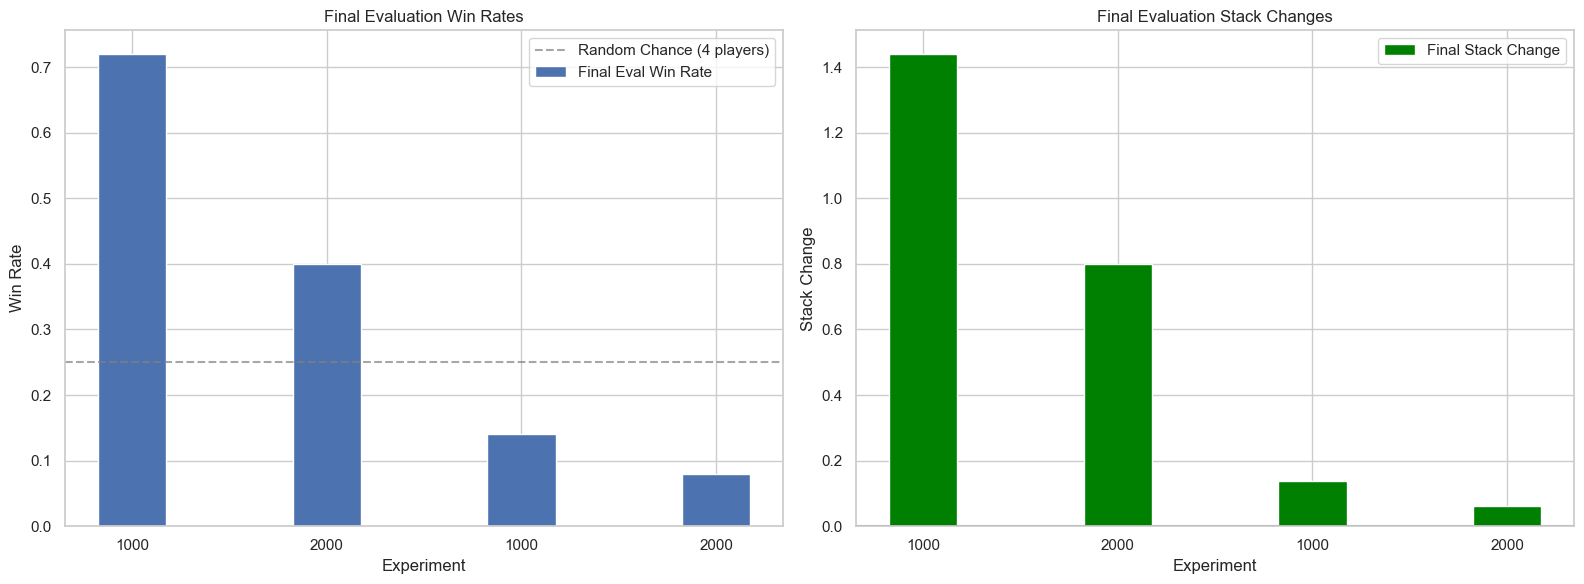

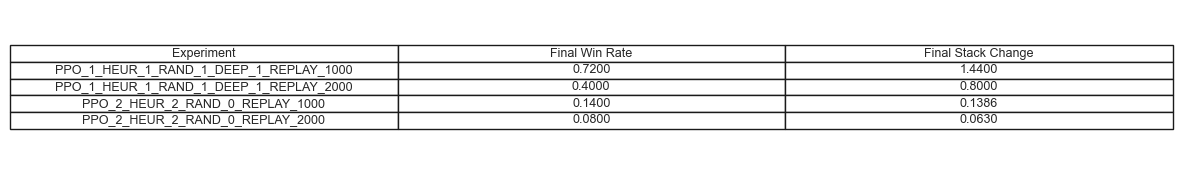

In [35]:
def plot_final_comparison(metrics_list):
    # Extract experiment names and final metrics
    experiments = [m['experiment'] for m in metrics_list]
    final_win_rates = [m['eval_win_rates'][-1] if m['eval_win_rates'] else 0 for m in metrics_list]
    final_stack_changes = [m['eval_stack_changes'][-1] if m['eval_stack_changes'] else 0 for m in metrics_list]
    
    # Shorten experiment names for display
    short_names = [exp.split('_')[-1] for exp in experiments]
    
    # Set up bar positions
    x = np.arange(len(short_names))
    width = 0.35
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot win rates
    ax1.bar(x, final_win_rates, width, label='Final Eval Win Rate')
    ax1.set_xlabel('Experiment')
    ax1.set_ylabel('Win Rate')
    ax1.set_title('Final Evaluation Win Rates')
    ax1.set_xticks(x)
    ax1.set_xticklabels(short_names)
    ax1.axhline(0.25, color='gray', linestyle='--', alpha=0.7, label='Random Chance (4 players)')
    ax1.legend()
    
    # Plot stack changes
    ax2.bar(x, final_stack_changes, width, color='green', label='Final Stack Change')
    ax2.set_xlabel('Experiment')
    ax2.set_ylabel('Stack Change')
    ax2.set_title('Final Evaluation Stack Changes')
    ax2.set_xticks(x)
    ax2.set_xticklabels(short_names)
    ax2.axhline(0, color='black', linestyle='-', alpha=0.5)
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Create a table with full experiment details
    fig, ax = plt.subplots(figsize=(15, len(experiments)*0.5))
    ax.axis('tight')
    ax.axis('off')
    
    table_data = []
    for i, exp in enumerate(experiments):
        table_data.append([exp, f"{final_win_rates[i]:.4f}", f"{final_stack_changes[i]:.4f}"])
    
    ax.table(cellText=table_data, 
             colLabels=['Experiment', 'Final Win Rate', 'Final Stack Change'],
             loc='center',
             cellLoc='center')
    
    plt.show()

plot_final_comparison(filtered_metrics)